In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

daily_data = pd.read_csv('../../data_lake/business/features/precios_diarios.csv',index_col = None, header=0)

daily_data.head() 

,Fecha,Precio
0,1995-07-20,1.409435
1,1995-07-21,4.924333
2,1995-07-22,1.269500
3,1995-07-23,0.953083
4,1995-07-24,4.305917


In [6]:
daily_data['Fecha'] = pd.to_datetime(daily_data['Fecha'])
daily_data.index = daily_data.Fecha

del(daily_data['Fecha'])
daily_data.head()

,Precio
Fecha,
1995-07-20,1.409435
1995-07-21,4.924333
1995-07-22,1.269500
1995-07-23,0.953083
1995-07-24,4.305917


<AxesSubplot:xlabel='Fecha'>

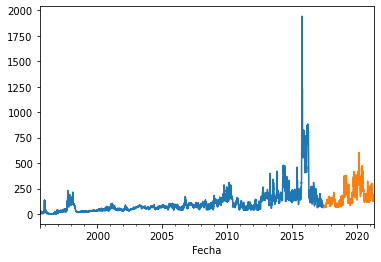

In [7]:
train = daily_data[:int(0.85*len(daily_data))]
valid = daily_data[int(0.85*(len(daily_data))):]

train['Precio'].plot()
valid['Precio'].plot()

In [13]:
!pip install statsmodels

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose as seasonal_decompose
result = seasonal_decompose(daily_data['Precio'], model ='multiplicative')
result.plot()

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\signaltools.py)

In [20]:
train = daily_data[:int(0.85*(len(daily_data)))]
test = daily_data[int(0.85*(len(daily_data))):]

In [21]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train['Precio'], seasonal = True,
                          trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)          
  
stepwise_fit.summary()

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\signaltools.py)

ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=71751.690, Time=1.58 sec

Best model:  ARIMA(2,1,3)(0,0,0)[1] intercept
Total fit time: 101.490 seconds
SARIMAX Results
Dep. Variable:	y	No. Observations:	8004
Model:	SARIMAX(2, 1, 3)	Log Likelihood	-35838.264
Date:	Sat, 02 Jul 2022	AIC	71690.528
Time:	03:54:37	BIC	71739.441
Sample:	0	HQIC	71707.270
- 8004		
Covariance Type:	opg		
coef	std err	z	P>|z|	[0.025	0.975]
intercept	0.0051	0.194	0.026	0.979	-0.375	0.386
ar.L1	1.2732	0.003	421.049	0.000	1.267	1.279
ar.L2	-0.9337	0.003	-341.332	0.000	-0.939	-0.928
ma.L1	-1.1756	0.004	-303.379	0.000	-1.183	-1.168
ma.L2	0.7443	0.004	171.374	0.000	0.736	0.753
ma.L3	0.1406	0.002	63.792	0.000	0.136	0.145
sigma2	454.0654	0.868	522.929	0.000	452.364	455.767
Ljung-Box (L1) (Q):	0.35	Jarque-Bera (JB):	48977778.28
Prob(Q):	0.56	Prob(JB):	0.00
Heteroskedasticity (H):	18.99	Skew:	-6.71
Prob(H) (two-sided):	0.00	Kurtosis:	386.01


In [ ]:
stepwise_fit = auto_arima(train['Precio'], seasonal = True,
                          trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = False)          
  
stepwise_fit.summary()

Best model:  ARIMA(4,1,5)(0,0,0)[0]          
Total fit time: 372.726 seconds
SARIMAX Results
Dep. Variable:	y	No. Observations:	8004
Model:	SARIMAX(4, 1, 5)	Log Likelihood	-35781.741
Date:	Sat, 02 Jul 2022	AIC	71583.482
Time:	04:00:51	BIC	71653.357
Sample:	0	HQIC	71607.399
- 8004		
Covariance Type:	opg		
coef	std err	z	P>|z|	[0.025	0.975]
ar.L1	-0.0856	0.010	-8.195	0.000	-0.106	-0.065
ar.L2	-1.3597	0.013	-107.376	0.000	-1.385	-1.335
ar.L3	-0.1403	0.011	-12.427	0.000	-0.162	-0.118
ar.L4	-0.6289	0.013	-48.355	0.000	-0.654	-0.603
ma.L1	0.1797	0.010	17.616	0.000	0.160	0.200
ma.L2	1.2960	0.013	96.942	0.000	1.270	1.322
ma.L3	0.1724	0.011	16.318	0.000	0.152	0.193
ma.L4	0.5704	0.013	43.733	0.000	0.545	0.596
ma.L5	-0.0893	0.005	-18.178	0.000	-0.099	-0.080
sigma2	447.4675	0.960	466.132	0.000	445.586	449.349
Ljung-Box (L1) (Q):	0.14	Jarque-Bera (JB):	44909072.51
Prob(Q):	0.71	Prob(JB):	0.00
Heteroskedasticity (H):	18.78	Skew:	-7.15
Prob(H) (two-sided):	0.00	Kurtosis:	369.70